In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

# Construct data set

In [13]:
data_dir ='kaggle-data/'

drivers_raw_df = pd.read_csv(f'{data_dir}/drivers.csv')
qualifying_raw_df = pd.read_csv(f'{data_dir}/qualifying.csv')
laptimes_raw_df = pd.read_csv(f'{data_dir}/lap_times.csv')
pitstops_raw_df = pd.read_csv(f'{data_dir}/pit_stops.csv')
constructor_standings_raw_df = pd.read_csv(f'{data_dir}/constructor_standings.csv')
seasons_raw_df = pd.read_csv(f'{data_dir}/seasons.csv')
circuits_raw_df = pd.read_csv(f'{data_dir}/circuits.csv')
constructors_raw_df = pd.read_csv(f'{data_dir}/constructors.csv')
driver_standings_raw_df = pd.read_csv(f'{data_dir}/driver_standings.csv')
results_raw_df = pd.read_csv(f'{data_dir}/results.csv')
status_raw_df = pd.read_csv(f'{data_dir}/status.csv')
races_raw_df = pd.read_csv(f'{data_dir}/races.csv')

print('drivers_raw_df', drivers_raw_df.columns)
print('qualifying_raw_df', qualifying_raw_df.columns)
print('laptimes_raw_df', laptimes_raw_df.columns)
print('pitstops_raw_df', pitstops_raw_df.columns)
print('constructor_standings_raw_df', constructor_standings_raw_df.columns)
print('seasons_raw_df', seasons_raw_df.columns)
print('circuits_raw_df', circuits_raw_df.columns)
print('constructors_raw_df', constructors_raw_df.columns)
print('driver_standings_raw_df', driver_standings_raw_df.columns)
print('results_raw_df', results_raw_df.columns)
print('status_raw_df', status_raw_df.columns)
print('races_raw_df', races_raw_df.columns)


drivers_raw_df Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
qualifying_raw_df Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')
laptimes_raw_df Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')
pitstops_raw_df Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')
constructor_standings_raw_df Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')
seasons_raw_df Index(['year', 'url'], dtype='object')
circuits_raw_df Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')
constructors_raw_df Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')
driver_s

In [14]:
results_raw_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [5]:
drivers = drivers_raw_df[['driverId','forename','surname']].reset_index(drop=True)
drivers['Name'] = drivers[['forename', 'surname']].agg(' '.join, axis=1)
drivers.drop(['forename','surname'], axis=1, inplace=True)

driver_name_id_map = dict(zip(drivers['Name'], drivers['driverId']))
def get_driverID(name):
    
    return drivers.loc[drivers['Name']==name, 'driverId'].squeeze()

#drivers[drivers['Name'].str.contains('Nyck')]

In [6]:
driver_names_of_interest = ['Max Verstappen',
                           'Sergio Pérez',
                           'Lewis Hamilton',
                           'Fernando Alonso',
                           'Charles Leclerc',
                           'Lando Norris',
                           'George Russell',
                           'Oscar Piastri',
                           'Lance Stroll',
                           'Pierre Gasly',
                           'Esteban Ocon',
                           'Alexander Albon',
                           'Nico Hülkenberg',
                           'Valtteri Bottas',
                           'Guanyu Zhou',
                           'Yuki Tsunoda',
                           'Kevin Magnussen',
                           #'Liam Lawson',
                           'Logan Sargeant',
                           'Nyck de Vries',
                           'Daniel Ricciardo']
driver_ids_of_interest = [driver_name_id_map[name] for name in driver_names_of_interest]


In [7]:
races_raw_df['Date'] = pd.to_datetime(races_raw_df['date'])

# add date (from races_raw_df) to laptimes
laptimes_raw_df.shape[0]
laptimes = laptimes_raw_df.merge(races_raw_df[['raceId','Date']], on='raceId', how='left')
assert laptimes.shape[0] == laptimes_raw_df.shape[0], 'confirm no duplicates formed during merge'

# add driver name to laptimes
laptimes_with_names = laptimes.merge(drivers[['driverId','Name']], on='driverId', how='left')
assert laptimes.shape[0] == laptimes_with_names.shape[0], 'confirm no duplicates formed during merge'

# Filter for drivers of interest
laptime_di = laptimes_with_names[laptimes_with_names['Name'].isin(driver_names_of_interest)].reset_index(drop=True)
assert laptime_di['driverId'].nunique() == len(driver_ids_of_interest), 'confirm we have lap data for all drivers of interest'

# laptime_di = laptime_di.sort_values(['raceId','lap','driverId'])

# Add status
prev_len = laptime_di.shape[0]

laptime_di = laptime_di.merge(results_raw_df[['raceId','driverId','statusId']], on=['raceId','driverId'])
laptime_di = laptime_di.merge(status_raw_df[['statusId','status']], on=['statusId'])
assert prev_len == laptime_di.shape[0]
laptime_di.drop(['statusId'], axis=1, inplace=True) # don't need statusId since we have status
laptime_di


,raceId,driverId,lap,position,time,milliseconds,Date,Name,status
0,841,1,1,2,1:40.573,100573,2011-03-27,Lewis Hamilton,Finished
1,841,1,2,2,1:33.774,93774,2011-03-27,Lewis Hamilton,Finished
2,841,1,3,2,1:32.900,92900,2011-03-27,Lewis Hamilton,Finished
3,841,1,4,2,1:32.582,92582,2011-03-27,Lewis Hamilton,Finished
4,841,1,5,2,1:32.471,92471,2011-03-27,Lewis Hamilton,Finished
...,...,...,...,...,...,...,...,...,...
151582,1088,852,39,10,1:17.362,77362,2022-09-04,Yuki Tsunoda,Differential
151583,1088,852,40,10,1:17.462,77462,2022-09-04,Yuki Tsunoda,Differential
151584,1088,852,41,10,1:17.276,77276,2022-09-04,Yuki Tsunoda,Differential
151585,1088,852,42,11,1:20.208,80208,2022-09-04,Yuki Tsunoda,Differential


# Validity Checks

## When was first pit stop

<AxesSubplot:xlabel='lap', ylabel='Count'>

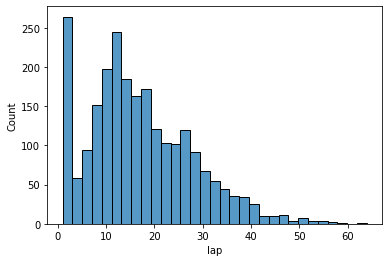

In [22]:
first_pitstop = pitstops_raw_df[pitstops_raw_df['stop']==1].reset_index(drop=True)
drivers = laptime_di[['raceId','driverId','Name']].drop_duplicates()

x = first_pitstop.merge(drivers, on=['raceId','driverId'])
sns.histplot(x, x='lap')

<AxesSubplot:xlabel='Name', ylabel='lap'>

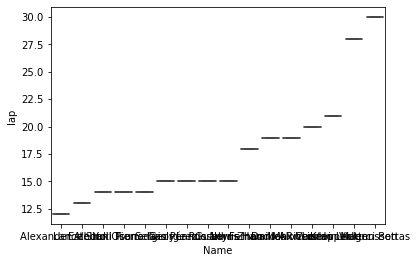

In [23]:
# visualize first pitstop for particular race
x = x[x['raceId']==1096]

sns.boxplot(data=x, x='Name',y='lap')

## make sure each driver has the same number of laps as other drivers for each race

In [33]:
# check if drivers have the same number of laps per race, for all races
n_laps_race = laptime_di.groupby(['raceId','driverId'])['lap'].max().reset_index(name='# laps')
assert (n_laps_race.groupby(['raceId','driverId'])['# laps'].max() == n_laps_race.groupby(['raceId','driverId'])['# laps'].min()).sum() / len(n_laps_race.groupby(['raceId','driverId'])['# laps'].max()) == 1
#del n_laps_race

In [52]:
n_laps_per_race = n_laps_race.groupby('raceId')['# laps'].max().reset_index(name='# laps per race').sort_values(['# laps per race'], ascending=False)
n_laps_per_race

,raceId,# laps per race
351,1046,87
220,905,78
299,994,78
162,846,78
201,885,78
...,...,...
101,103,11
96,98,8
129,148,7
125,144,5


<AxesSubplot:xlabel='# laps per race', ylabel='Count'>

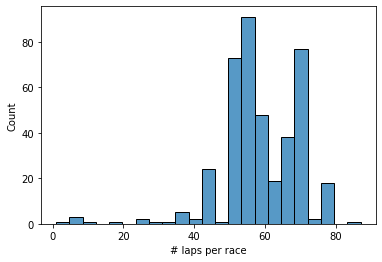

In [53]:
sns.histplot(n_laps_per_race, x='# laps per race')

# EDA

In [25]:
print('number of races:', laptime_di['raceId'].nunique())

number of races: 409


In [29]:
number_of_races_per_driver = laptime_di.groupby('Name')['raceId'].nunique().reset_index()
number_of_races_per_driver
#sns.histplot(number_of_races_per_driver, x='raceId',hue='Name')

,Name,raceId
0,Alexander Albon,69
1,Charles Leclerc,109
2,Daniel Ricciardo,232
3,Esteban Ocon,118
4,Fernando Alonso,361
5,George Russell,93
6,Guanyu Zhou,33
7,Kevin Magnussen,151
8,Lance Stroll,130
9,Lando Norris,94


In [30]:
# check if drivers have the same number of laps per race, for all races
n_laps_race = laptime_di.groupby(['raceId','driverId'])['lap'].max().reset_index(name='# laps')
assert (n_laps_race.groupby(['raceId','driverId'])['# laps'].max() == n_laps_race.groupby(['raceId','driverId'])['# laps'].min()).sum() / len(n_laps_race.groupby(['raceId','driverId'])['# laps'].max()) == 1
del n_laps_race

In [223]:
def graph_race(raceId):
    
    sns.lineplot(data=laptime_di[laptime_di['raceId']==1106], x='lap',y='milliseconds',hue='Name')

In [212]:
idx = (laptime_di.groupby(['raceId'])['driverId'].nunique() >= 19).sum()
idx
#laptime_di.loc[idx]

10

In [201]:
laptime_di['Date'].dtype

dtype('<M8[ns]')

In [182]:
(n_laps_race.groupby(['raceId','driverId'])['# laps'].max() == n_laps_race.groupby(['raceId','driverId'])['# laps'].min()).sum()

2716

In [183]:
len(n_laps_race.groupby(['raceId','driverId'])['# laps'].max())

2716

In [184]:
laptime_di.groupby(['raceId','driverId']).size().idxmin()

(881, 4)

In [213]:
n_laps_race.groupby(['raceId','driverId'])['# laps'].max().size()[0]

NameError: name 'n_laps_race' is not defined

## Do driver's drive more than one car?

In [11]:
driver_standings_raw_df


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


In [9]:
constructor_standings_raw_df

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


In [ ]:
laptime_di.merge(constructors_raw_df[['constructorId','name']], on='constructorId')

# Export data

In [2]:
laptime_di

NameError: name 'laptime_di' is not defined

In [8]:
laptime_di.to_csv('laptimes.csv', index=False)